In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from subprocess import check_output
import copy

## Overview the Data Set
+ Use "sign language digits data set" for this tutorial.
+ In this data there are 2062 sign language digits images.
+ As you know digits are from 0 to 9. Therefore there are 10 unique sign.
+ At the beginning of tutorial we will use only sign 0 and 1 for simplicity.
+ Trong dữ liệu, dấu 0 nằm giữa chỉ số 204 và 408. Số dấu 0 là 205.
+ Also sign one is between indexes 822 and 1027. Number of one sign is 206. Therefore, we will use 205 samples from each classes(labels).

## **Trong ví dụ này ta chỉ lấy số 0 và số 1 làm ví dụ cho Logistic Regresion**
+ 0 : 204 -> 408 (205 images)
+ 1 : 822 -> 1227 (206 images)

In [124]:
x_1 = np.load("/home/tuandinh/Desktop/AI and Machine Learning/Deep Learning Coursera/Self Practice/data/X.npy")
y_1 = np.load("/home/tuandinh/Desktop/AI and Machine Learning/Deep Learning Coursera/Self Practice/data/Y.npy")

(-0.5, 63.5, 63.5, -0.5)

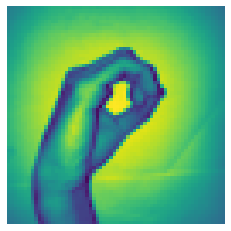

In [125]:
img_size = 64
plt.subplot(1,1,1)
plt.imshow(x_1[260].reshape(img_size, img_size))
plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

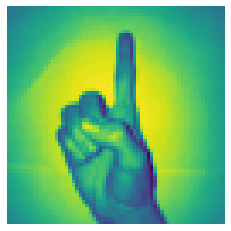

In [126]:
plt.subplot(1,1,1)
plt.imshow(x_1[900].reshape(img_size, img_size))
plt.axis('off')

In [127]:
X = np.concatenate((x_1[204:409],x_1[822:1027]), axis=0)
z = np.zeros(205)
o = np.zeros(205)
y = np.concatenate((z,o), axis=0).reshape(X.shape[0],1)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (410, 64, 64)
y shape: (410, 1)


> The shape of the X is (410, 64, 64)
   + 410 means that we have 410 images (zero and one signs)
   + 64 means that our image size is 64x64 (64x64 pixels)
> The shape of the Y is (410,1)
   + 410 means that we have 410 labels (0 and 1)
> Lets split X and Y into train and test sets
   + test_size = percentage of test size. test = 15% and train = 85%
   + random_state = use same seed while randomizing. It means that if we call train_test_split repeatedly, it always creates same train and test distribution because we have same random_state.

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42 )
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
num_px = X_train.shape[1]
print ("Number of training examples: m_train = " + str(number_of_train))
print ("Number of testing examples: m_test = " + str(number_of_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 348
Number of testing examples: m_test = 62
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (348, 64, 64)
train_set_y shape: (348, 1)
test_set_x shape: (62, 64, 64)
test_set_y shape: (62, 1)


> Now we have 3 dimensional input array (X) so we need to make it flatten (2D) in order to use as input for our first deep learning model.

> Our label array (Y) is already flatten(2D) so we leave it like that.

> Lets flatten X array(images array).

In [129]:
X_train_flatten = X_train.reshape(X_train.shape[0],-1).T
X_test_flatten = X_test.reshape(X_test.shape[0],-1).T

print(f"Train set flatten shape: {str(X_train_flatten.shape)}")
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(X_test_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))

Train set flatten shape: (4096, 348)
train_set_y shape: (348, 1)
test_set_x_flatten shape: (4096, 62)
test_set_y shape: (62, 1)


> If your data i not scale, you need divide your data / 255

In [130]:
def sigmoid(x):
    s = 1.0/(1+ np.exp(-x))
    return s

In [131]:
# Innitialize params
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0.0
    return w,b

## Forward and Backward propagation

In [132]:
def propagate(w,b,X,Y):
    # Forward propagation
    m = X.shape[1]
    z = np.dot(w.T,X) + b
    A = sigmoid(z)
    cost = np.sum(-Y*np.log(A) + (1-Y)*-np.log(1-A))/m

    # Backward propagation
    dw = (1/m)*np.dot(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    cost = np.squeeze(np.array(cost))

    grads = {"dw":dw, "db":db}

    return grads, cost


##  Optimization with gradient Descent

In [133]:
def optimize(w,b,X,Y,num_iterations = 100, learning_rate = 0.05, print_cost=False):
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    """ 
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)
        # Retrieve derivatives from grads

        w = w - learning_rate*grads["dw"]
        b = b - learning_rate*grads["db"]
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w":w,
            "b":b}
    grads = {"dw":grads["dw"],
            "db":grads["db"]}
    
    return params, grads, costs        

### Create function for predict

In [134]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    # w = w.reshape(X.shape[0],1)
    z = np.dot(w.T,X) + b
    A = sigmoid(z)
    
    for i in range(A.shape[1]):
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    return Y_prediction

### Create Model

In [135]:
def model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.01, print_cost=False):
    m = X_train.shape[0]

    w,b = initialize_with_zeros(m)
    params, grads, costs = optimize(w,b,X_train, y_train, num_iterations, learning_rate, print_cost=False)
    w = params["w"]
    b = params["b"]
    Y_prediction_test =  predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))
    
    d = {
        "costs":costs,
        "Y_prediction_test":Y_prediction_test,
        "Y_prediction_train":Y_prediction_train,
        "w":w,
        "b":b,
        "learning_rate":learning_rate,
        "num_iterations":num_iterations
    }

    return d

In [136]:
logistic_regression_model = model(X_train_flatten, y_train, X_test_flatten, y_test, num_iterations=1000, learning_rate=0.01, print_cost=True)

train accuracy: 100.0 %
test accuracy: 100.0 %


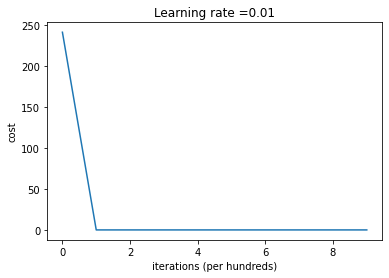

In [137]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

## Logistic Regression with Sklearn